<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Exerc%C3%ADcio_de_correla%C3%A7%C3%A3o_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1>Tema central: Exercício de correlação linear simples</h1><h2>Contexto</h2><ul><li>Ministério da Educação solicitou uma previsão do percentual de alunos aprovados em 2017</li><li>A previsão deve ser baseada nos dados de aprovação de 2015 e 2016</li></ul><h2>Objetivo</h2><ul><li>Criar um modelo para prever o percentual de aprovações em 2016, usando os dados de 2015</li><li>Fazer tratamento dos dados</li><li>Realizar regressão linear</li><li>Calcular o resíduo para avaliar o erro do modelo</li></ul><h2>Etapas</h2><ol><li>Obter dataset com percentual de aprovações em 2015 e 2016</li><li>Definir variável target: aprovações 2016</li><li>Fazer previsão de 2016 baseada nos dados de 2015</li><li>Realizar tratamento de dados:<ul><li>Limpeza</li><li>Transformação</li><li>Análise exploratória</li></ul></li><li>Executar regressão linear</li><li>Calcular estatísticas do modelo:<ul><li>R2</li><li>Erro quadrático médio</li><li>Resíduos</li></ul></li><li>Estimar acurácia do modelo comparando previsões e dados reais de 2016</li></ol><h2>Entrega</h2><ul><li>Jupyter notebook com:<ul><li>Importação e tratamento dos dados</li><li>Modelagem</li><li>Previsões</li><li>Avaliação do modelo</li></ul></li></ul><p>Espero ter resumido de forma completa e detalhada os principais tópicos e etapas envolvidas no exercício solicitado no vídeo. Utilizei a formatação Markdown para facilitar a visualização. Caso tenha ficado alguma dúvida, por favor me avise.</p>

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [154]:
df = pd.read_excel("/content/C├│pia de aprovacao_alunos (1).xlsx")



In [155]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [156]:
df.tail()

,UF,ano_2015,ano_2016
22,RS,76,74
23,MS,76,78
24,MT,68,70
25,Goias,86,87
26,DF,82,83


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [158]:
df.describe(

)

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [159]:
df['ID'] = range(1, len(df) + 1)

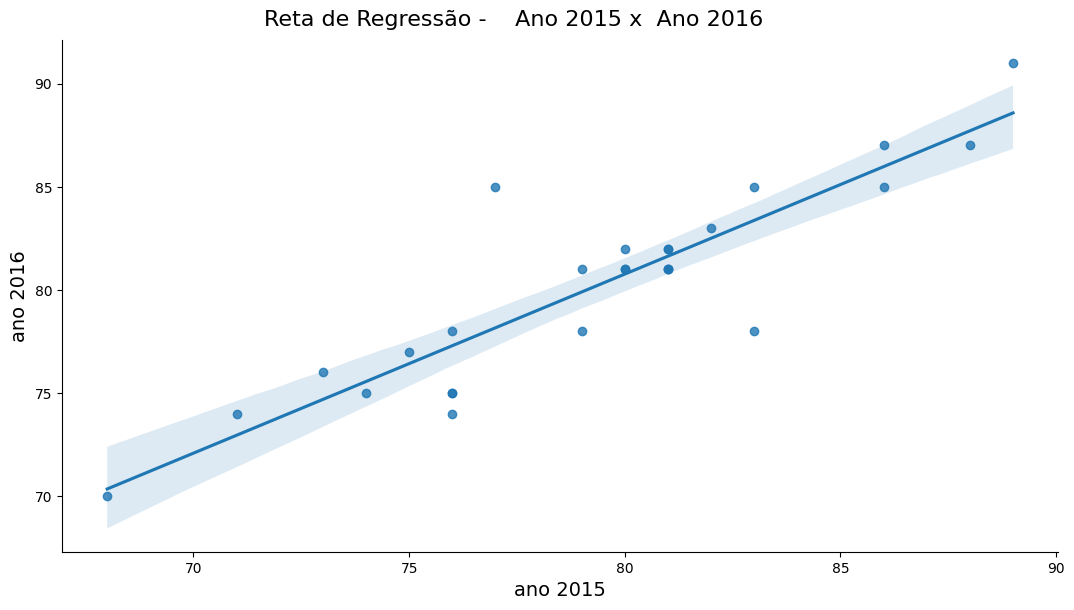

In [160]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão -    Ano 2015 x  Ano 2016', fontsize=16, y=1.02)
ax.set_xlabels("ano 2015", fontsize=14)
ax.set_ylabels("ano 2016", fontsize=14)
ax;

In [161]:
fig = px.bar(df, x='UF', y='ano_2015')
fig.show()

In [162]:
fig = px.bar(df, x='UF', y='ano_2016')
fig.show()

In [163]:
df_X = pd.get_dummies(df, columns=['UF'], drop_first=True)

In [164]:
df_X.corr()

,ano_2015,ano_2016,ID,UF_Alagoas,UF_Amapa,UF_Amazonas,UF_Bahia,UF_Ceara,UF_DF,UF_ES,...,UF_Piaui,UF_RJ,UF_RN,UF_RS,UF_Rondonia,UF_Roraima,UF_SC,UF_SP,UF_Sergipe,UF_Tocantins
ano_2015,1.000000,0.894957,0.022429,-0.174281,-0.134062,0.147468,-0.134062,0.268124,0.107250,0.026812,...,0.026812,0.147468,-0.214500,-0.134062,-0.093844,0.067031,0.026812,0.348562,-0.335156,0.067031
ano_2016,0.894957,1.000000,-0.128679,-0.132064,-0.214988,0.199632,-0.214988,0.199632,0.116708,0.033784,...,0.033784,-0.090602,-0.214988,-0.256450,0.199632,0.075246,0.075246,0.282556,-0.256450,0.075246
ID,0.022429,-0.128679,1.000000,0.000000,-0.201432,-0.276969,0.050358,-0.100716,0.327327,0.100716,...,-0.125895,0.125895,-0.075537,0.226611,-0.327327,-0.251790,0.201432,0.151074,0.025179,-0.176253
UF_Alagoas,-0.174281,-0.132064,0.000000,1.000000,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_Amapa,-0.134062,-0.214988,-0.201432,-0.038462,1.000000,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_Amazonas,0.147468,0.199632,-0.276969,-0.038462,-0.038462,1.000000,-0.038462,-0.038462,-0.038462,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_Bahia,-0.134062,-0.214988,0.050358,-0.038462,-0.038462,-0.038462,1.000000,-0.038462,-0.038462,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_Ceara,0.268124,0.199632,-0.100716,-0.038462,-0.038462,-0.038462,-0.038462,1.000000,-0.038462,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_DF,0.107250,0.116708,0.327327,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,1.000000,-0.038462,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462
UF_ES,0.026812,0.033784,0.100716,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,1.000000,...,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462,-0.038462


In [165]:
Y = df_X.ano_2015
X = sm.add_constant(df_X.ano_2016)

In [166]:
Y.head()

0    77
1    79
2    83
3    81
4    73
Name: ano_2015, dtype: int64

In [167]:
resultado_regressao = sm.OLS(Y, X).fit()

In [168]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sun, 19 May 2024   Prob (F-statistic):           3.02e-10
Time:                        01:30:32   Log-Likelihood:                -59.298
No. Observations:                  27   AIC:                             122.6
Df Residuals:                      25   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3525      7.389      0.724      0.4

In [169]:
df_X['Y_previsto'] = resultado_regressao.predict()
df_X.head()

,ano_2015,ano_2016,ID,UF_Alagoas,UF_Amapa,UF_Amazonas,UF_Bahia,UF_Ceara,UF_DF,UF_ES,...,UF_RJ,UF_RN,UF_RS,UF_Rondonia,UF_Roraima,UF_SC,UF_SP,UF_Sergipe,UF_Tocantins,Y_previsto
0,77,85,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,83.775598
1,79,81,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,80.085101
2,83,85,3,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,83.775598
3,81,82,4,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,81.007725
4,73,76,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,75.471980


In [177]:
df_2 = df_X.loc[:, ~df_X.isin([False]).any(axis=0)]


In [178]:
df_2

,ano_2015,ano_2016,ID,Y_previsto
0,77,85,1,83.775598
1,79,81,2,80.085101
2,83,85,3,83.775598
3,81,82,4,81.007725
4,73,76,5,75.471980
5,76,75,6,74.549356
6,81,82,7,81.007725
7,81,81,8,80.085101
8,80,81,9,80.085101
9,86,85,10,83.775598


In [197]:
df_R = pd.merge(df_2, df[['ID', 'UF']], on='ID', how='right')

In [202]:
df_R.reset_index()

,index,ano_2015,ano_2016,ID,Y_previsto,UF
0,0,77,85,1,83.775598,Rondonia
1,1,79,81,2,80.085101,Acre
2,2,83,85,3,83.775598,Amazonas
3,3,81,82,4,81.007725,Roraima
4,4,73,76,5,75.471980,Para
5,5,76,75,6,74.549356,Amapa
6,6,81,82,7,81.007725,Tocantins
7,7,81,81,8,80.085101,Maranhao
8,8,80,81,9,80.085101,Piaui
9,9,86,85,10,83.775598,Ceara


In [203]:
df_R["residuo"] = df_R["Y_previsto"] - df_R["ano_2016"]
df_R.head()

,ano_2015,ano_2016,ID,Y_previsto,UF,residuo
0,77,85,1,83.775598,Rondonia,-1.224402
1,79,81,2,80.085101,Acre,-0.914899
2,83,85,3,83.775598,Amazonas,-1.224402
3,81,82,4,81.007725,Roraima,-0.992275
4,73,76,5,75.471980,Para,-0.528020
